## Decision Tree and Random Forest Project

For this project, we will be exploring publicly available data from LendingClub.com. Lending Club connects people who needs money (borrowers) with people who have money (investors). Hopefully, as an investor you would want to invest in people who show a profile of having a high probability of paying you back. This project tries to help predict this.

We have a csv file named, loan_data.csv in the repoistry, which contains the data from the year 2007 - 2010 before the the company went public. We will try to classify and predict whether or not the borrower paid back their loan in full. 

The columns of the CSV file represent: 

1. credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com and 0 otherwise

2. purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").

3. int.rate: The interset rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interset rates.

4. installment: The monthly installments owed by the borrower if the loan is funded.

5. log.annual.inc: The natural log of the self-reported annual income of the borrower.

6. dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).

7. fico: The FICO credit score of the borrower.

8. days.with.cr.line: The number of days the borrower has had a credit line.

9. revol.bal: The borrower's revovling balance (amount unpaid at the end of the credit card biling cycle).

10. inq.last.6mnths: The borrower's number of inquiries by creditors in the last 6 months.

11. delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.

12. pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax, liens, or judgements).

## Import Libraries

Import libraries for pandas and plotting. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Import the Dataset

Use pandas to read "loan_data.csv" as a dataframe called loans.

In [3]:
loans = pd.read_csv('loan_data.csv')

#### Check out the info(), head(), and describe() methods on loans.

In [4]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [5]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [6]:
loans.head(5)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


## Exploratory Data Analysis

Let's do some data visualization. We will use seaborn and pandas built-in plotting capabilities for the purpose.

#### Create a histogram of two FICO distribution on top of each other, one for each credit.policy outcome

Text(0.5, 0, 'FICO score')

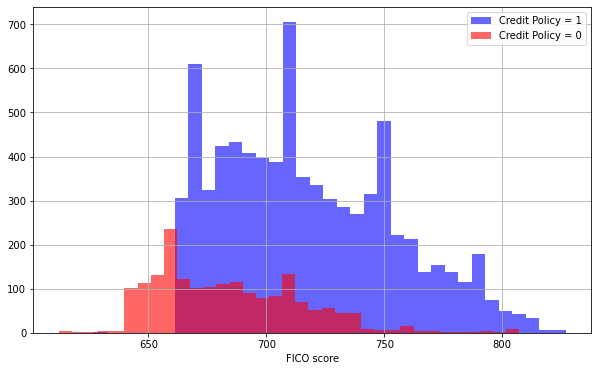

In [7]:
plt.figure(figsize = (10, 6))
loans[loans['credit.policy']==1]['fico'].hist(bins = 35, color = 'blue', 
                                              label = 'Credit Policy = 1', 
                                              alpha = 0.6)
loans[loans['credit.policy']==0]['fico'].hist(bins = 35, color = 'red', 
                                              label = 'Credit Policy = 0', 
                                              alpha = 0.6)
plt.legend()
plt.xlabel('FICO score')

#### We can create a similar figure, this time by select by the not.full.paid

Text(0.5, 0, 'FICO score')

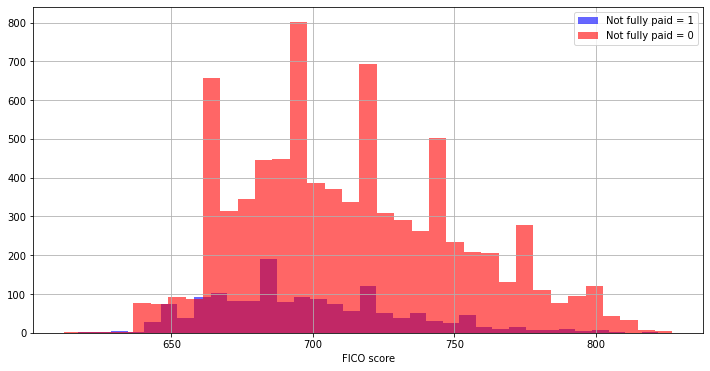

In [10]:
plt.figure(figsize = (12, 6))
loans[loans['not.fully.paid']==1]['fico'].hist(bins = 35, color = 'blue', 
                                              label = 'Not fully paid = 1', 
                                              alpha = 0.6)
loans[loans['not.fully.paid']==0]['fico'].hist(bins = 35, color = 'red', 
                                              label = 'Not fully paid = 0', 
                                              alpha = 0.6)
plt.legend()
plt.xlabel('FICO score')

What we interpret from this graph is that most of the people are fully repaying the loan. A relatively smaller number of people are not paying the loans back, and furthermore, their FICO score lies between 640 - 775. 

We can also see that the distribution of people paying the loan back and not paying back is almost the same.

Also there are spikes are some points in the graph. That is mainly because how the FICO score works. 

#### Create a counterplot using the seaborn showing the counts of loans by purchase, with the color hue defined by not.fully.paid

In order to do this, we need to call sns.countplot()

<AxesSubplot:xlabel='purpose', ylabel='count'>

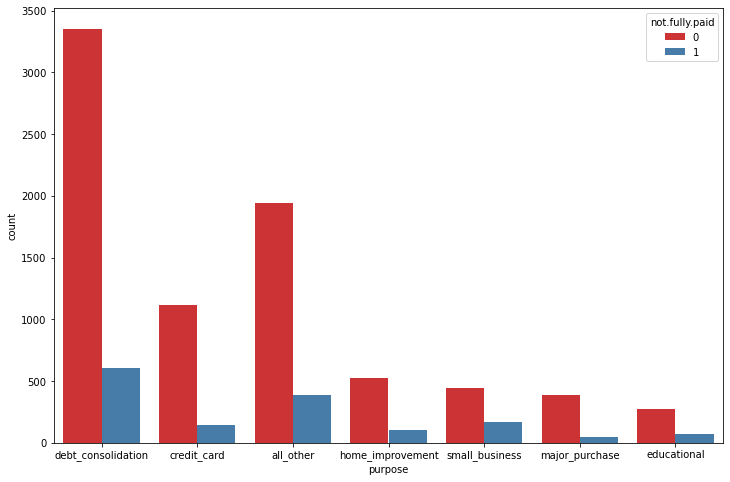

In [11]:
plt.figure(figsize = (12,8))
sns.countplot(x = 'purpose', hue = 'not.fully.paid', data = loans, palette = 'Set1')

Looking at the graph, we can conclude that "debt consolidation" is the most popular for wanting a loan and then "credit card" and others. 

Something to notice in this graph is that the ratio between fully paid and not fully paid seems to pretty similar between all the reasons.

#### Visualize the trend between the FICO score and the interset rate

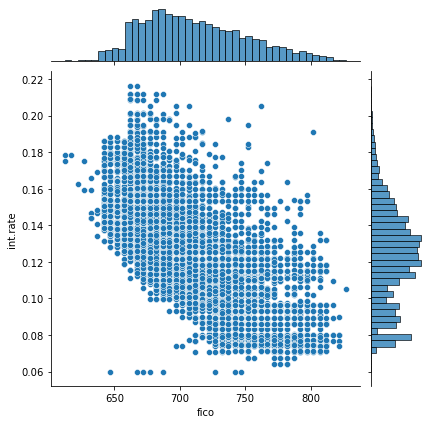

In [13]:
sns.jointplot(x = 'fico', y = 'int.rate', data = loans)

This graphs shows that as the fico score increases, you have better credit score and thus you are more likely to get a lower interset rate as opposed to if you have lesser fico score, then your credit score is less, and you are more likely to get higher interset rate on loans.

#### Create the plots to see if the trend differed between not.fully.paid and credit.policy.

<Figure size 864x576 with 0 Axes>

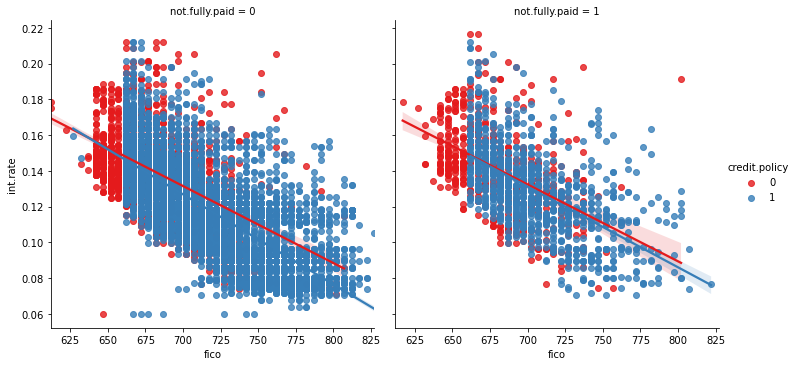

In [19]:
plt.figure(figsize = (12,8))
sns.lmplot(y = 'int.rate', x = 'fico', data = loans,
          hue = 'credit.policy',
          col = 'not.fully.paid',
          palette = 'Set1')

Everything before "hue" produces a simple lm plot with one linear line. 

With "hue = credit.policy", we get a color difference, red and blue which represents the credit policy.

"col" helps the plot to split into two plots.

We can see that behavior of both the plots and regression models are the same. 

## Setting up the Data

If we check out the loans.info() again

In [20]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


We see that we have a categorical column in the dataset, purpose.

## Categorical Feature

We need to transform the categorical data into something meaninful to the regression model. We will use dummy variables from sklearn to do that.

#### Create a list of 1 element containing the string 'purpose.'

In [22]:
cat_feats = ['purpose']

#### Now use pd.get_dummies(loans, column = cat_feats, drop_first = True) to create a fixed larger dataframe that has new feature columns with dummy variables. Set this data frame as final data.

In [24]:
final_data = pd.get_dummies(loans, columns = cat_feats, drop_first = True)

In [25]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_credit_card         9578 

In [26]:
final_data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


Upon scrolling to the right, we will see that the data frame has been split into multiple columns as the categorical column has been split into different values of zeros and ones.

## Train Test Split

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X = final_data.drop('not.fully.paid', axis = 1 ) # axis=1 since its a column
y = final_data['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Training a Decision Tree Model

#### Import Decision Tree Classifer 

In [36]:
from sklearn.tree import DecisionTreeClassifier

In [38]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train )

DecisionTreeClassifier()

## Predictions and Evaluation of Decision Tree

#### Create predictions from the test set and create a classfication report and a confusion matrix

In [39]:
predictions = dtree.predict(X_test)

In [40]:
from sklearn.metrics import classification_report,confusion_matrix

In [41]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84      2431
           1       0.19      0.23      0.21       443

    accuracy                           0.73      2874
   macro avg       0.52      0.53      0.52      2874
weighted avg       0.75      0.73      0.74      2874



In [43]:
print(confusion_matrix(y_test, predictions))

[[2001  430]
 [ 340  103]]
